In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import argparse
from codecarbon import EmissionsTracker

In [71]:
data_prepath = os.path.join("out", "GoT_emotions.csv")
data_emotions = pd.read_csv(data_prepath, index_col=0, usecols=[0,2,7])
data_emotions.dropna(subset=["emotion_label"], inplace=True)

In [77]:
column = "emotion_label"
unique_col = list(data_emotions[column].unique())
col_length = []

for n in range(len(unique_col)):
    col_value = unique_col[n]
    col_length = col_length + [len(data_emotions.loc[data_emotions[column] == f"{col_value}"])]

rel_freq =  data_emotions.value_counts().reset_index().rename(columns={"index": "value", 0: "counts"})
rel_freq["Relative Frequency"] = ""

for col_value, length in zip(unique_col, col_length):
    rel_freq.loc[rel_freq[column] == col_value, "Relative Frequency"] = rel_freq.loc[rel_freq[column] == col_value, "count"]/length * 100

In [78]:
rel_freq

,Season,emotion_label,count,Relative Frequency
0,Season 2,neutral,1887,16.395864
1,Season 3,neutral,1729,15.023025
2,Season 4,neutral,1591,13.823964
3,Season 5,neutral,1447,12.572769
4,Season 1,neutral,1422,12.355548
5,Season 6,neutral,1422,12.355548
6,Season 7,neutral,1277,11.095664
7,Season 8,neutral,734,6.377618
8,Season 2,anger,642,16.925916
9,Season 4,anger,551,14.52676


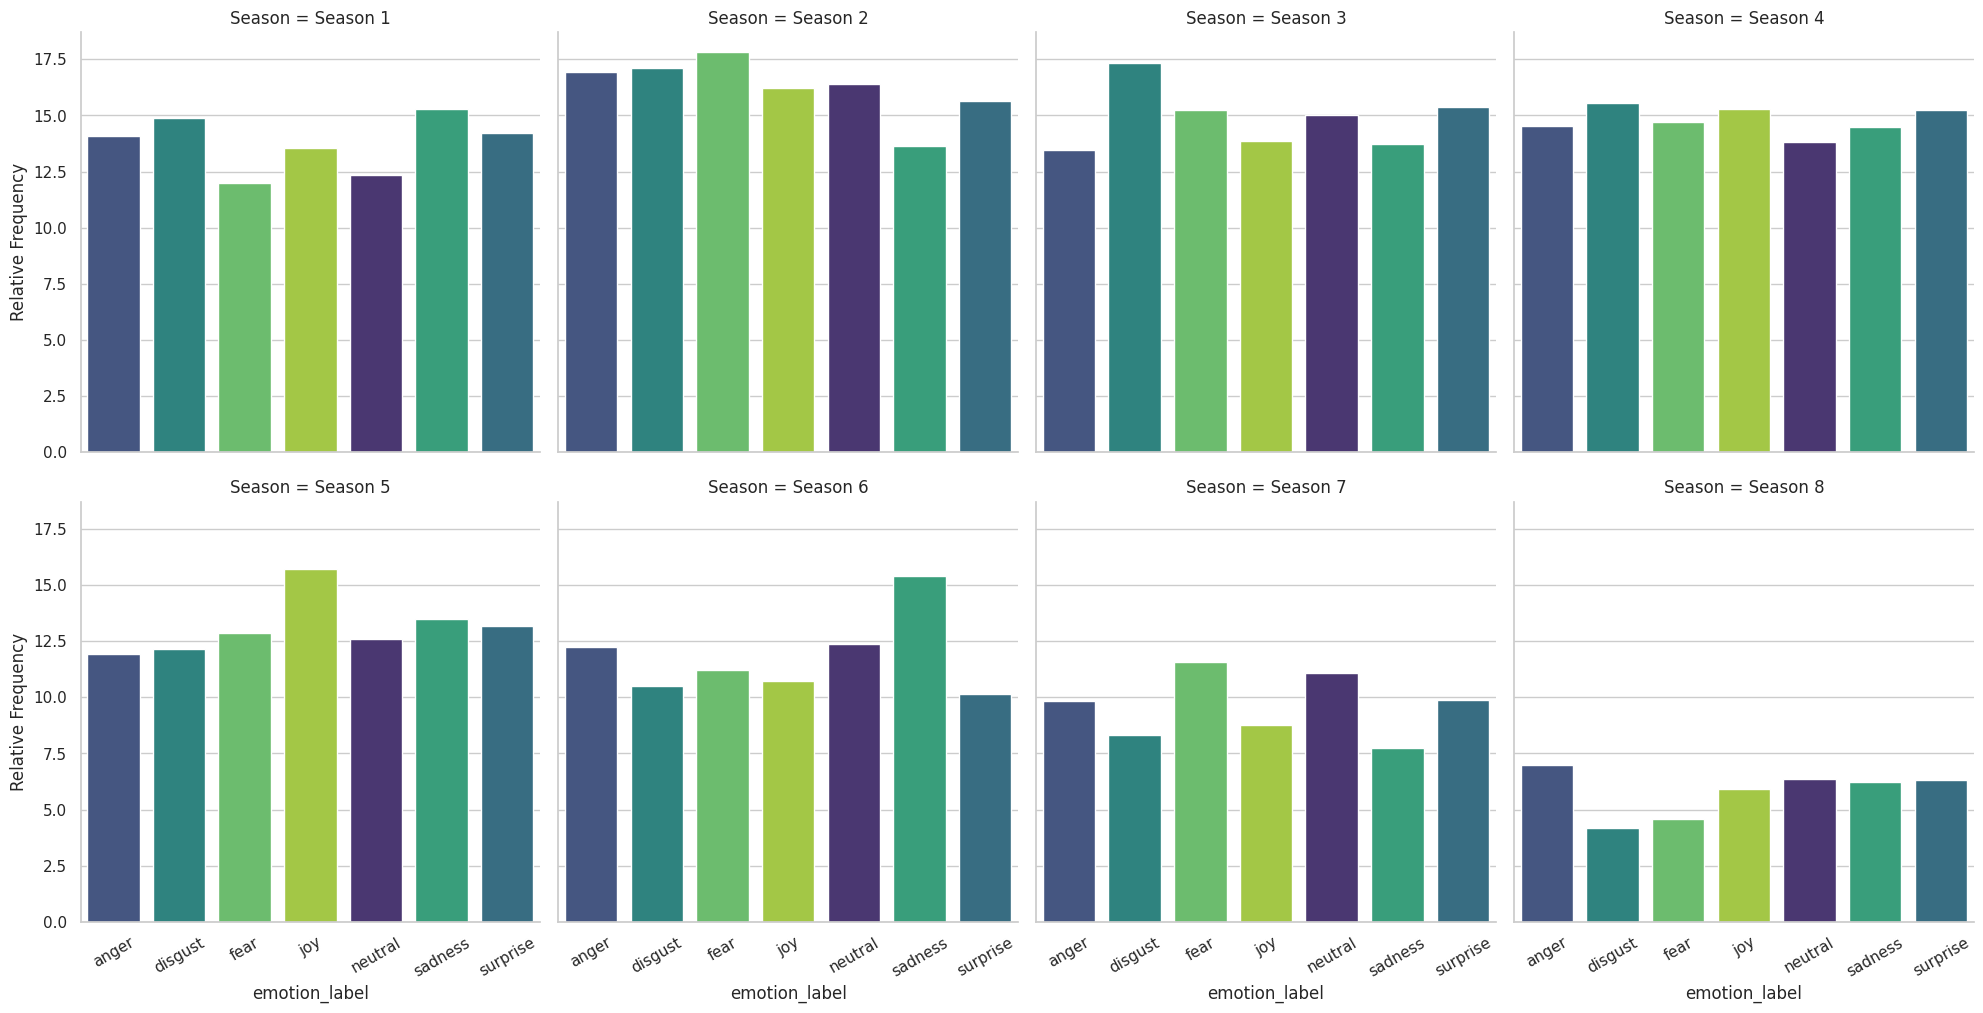

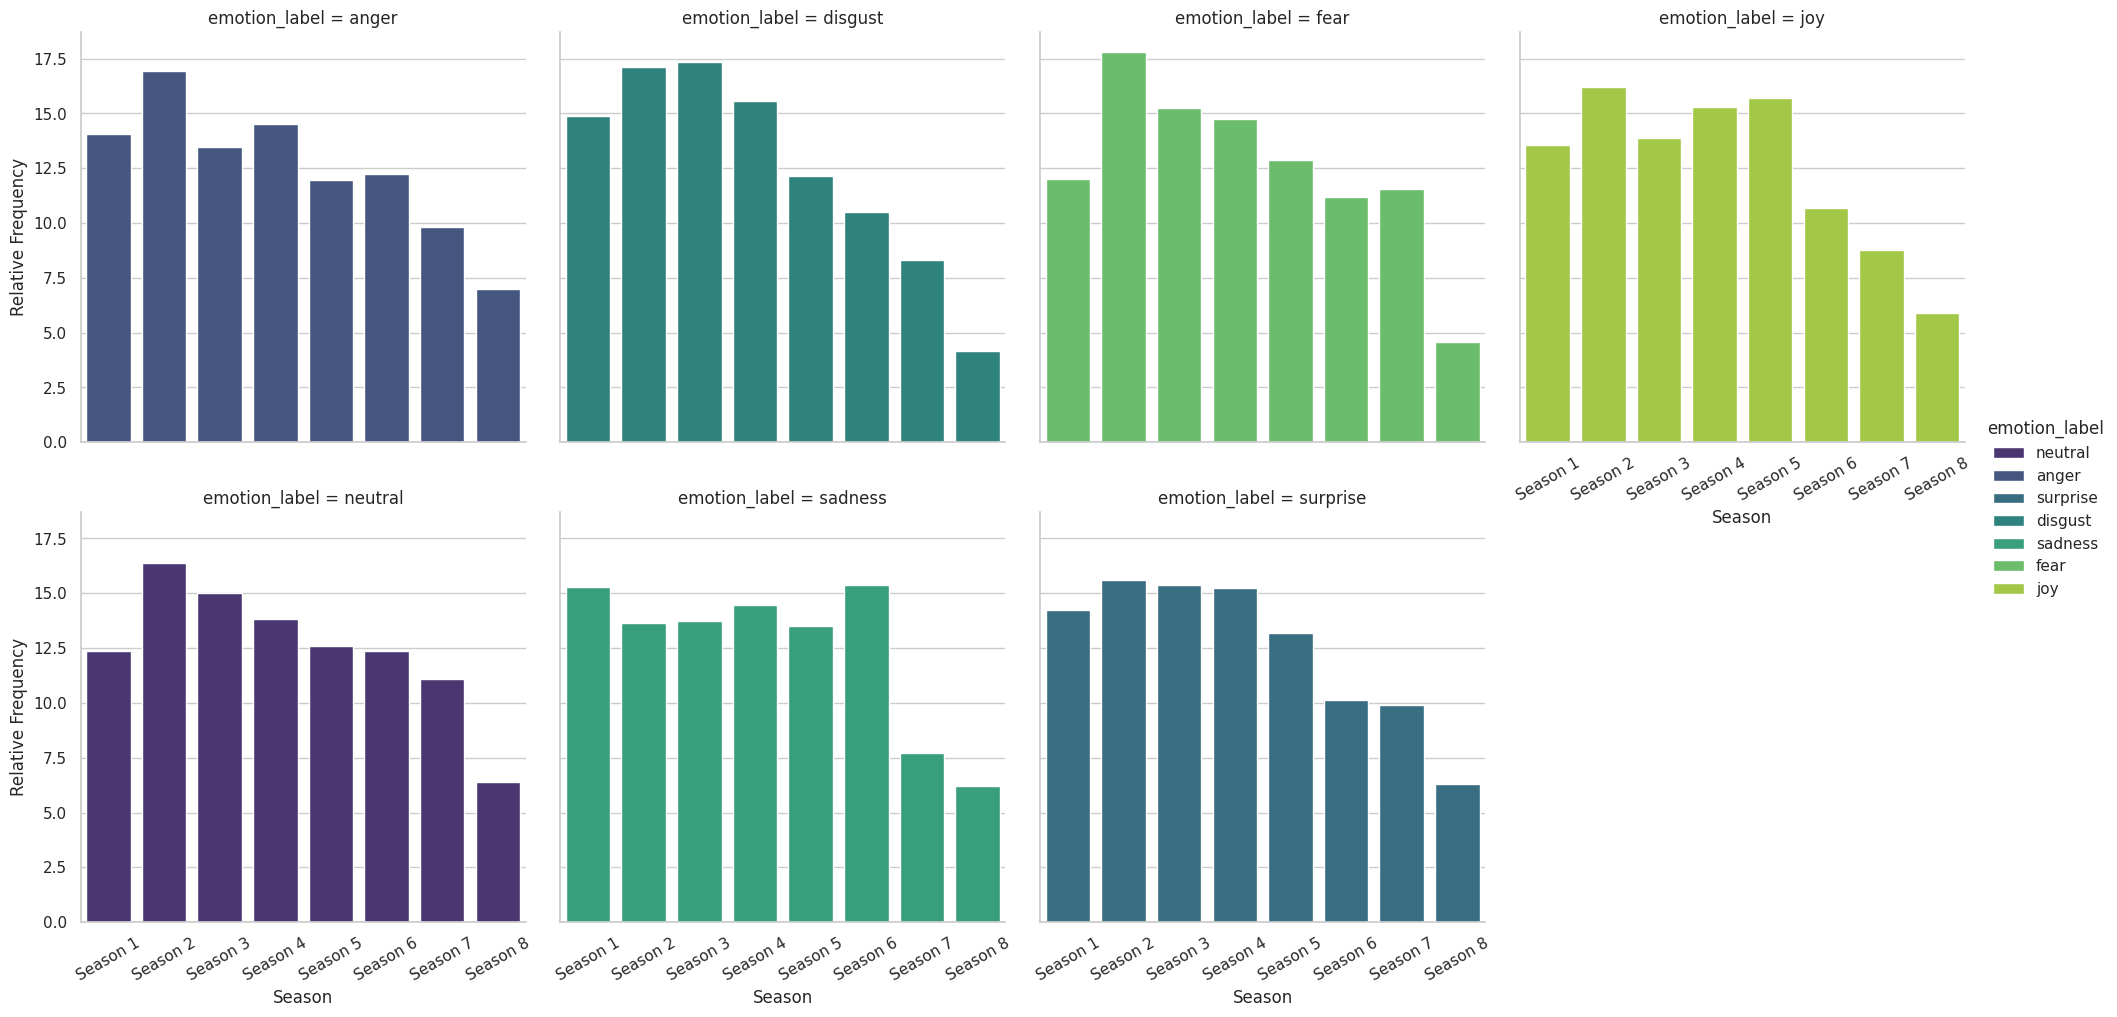

In [79]:

def bar_plot(data, xcol, subsep, suborder, xorder, neut, subcols):
    """
    """
    sns.set_theme(style = "whitegrid")
    g = sns.catplot(data, 
                    x= xcol, 
                    y = "Relative Frequency",
                    hue = "emotion_label",  
                    col = subsep, 
                    kind = "bar",
                    col_wrap = subcols,
                    col_order = suborder,
                    fill = True, 
                    order = xorder,
                    palette = sns.mpl_palette("viridis", 7))
    g.set_xticklabels(labels=xorder, rotation=30) 
    plt.show()
    #plt.savefig(os.path.join("out", f"{subsep}_subplot_{neut}.png"))


def plot_emotions(dataframe, neut):
    """
    The function takes a dataframe and a string indicating whether or not to keep the neutral emotion label. It 
    utilises the bar_plot() function, and saves both a plot with subplots based on seasons and emotion labels. 
    """
    seasons =  ["Season 1", "Season 2", "Season 3", "Season 4", "Season 5", "Season 6", "Season 7", "Season 8"]
    emotions = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]
    if neut == "w_neut":
        bar_plot(dataframe, "emotion_label", "Season", seasons, emotions, neut, 4)
        bar_plot(dataframe, "Season", "emotion_label", emotions, seasons, neut, 4)
        
    elif neut == "rm_neut":
        emotions.remove("neutral")
        dataframe_rm_neut = dataframe[dataframe["emotion_label"] != "neutral"]
        bar_plot(dataframe_rm_neut, "emotion_label", "Season", seasons, emotions, neut, 4)
        bar_plot(dataframe_rm_neut, "Season", "emotion_label", emotions, seasons, neut, 3)

plot_emotions(rel_freq, "w_neut")
